# Import Dataset & Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from string import punctuation
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
shakira = pd.read_csv('Youtube05-Shakira.csv',encoding='utf-8-sig')
shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


## Attributes

In [3]:
shakira.shape

(370, 5)

There are 370 observations and 5 attributes

In [3]:
shakira.dtypes

COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [3]:
shakira['DATE']=shakira['DATE'].astype('datetime64[ns]')
shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29 02:30:18.971,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29 00:14:48.748,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28 21:00:08.607,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28 20:47:12.193,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28 17:08:29.827,shakira is best for worldcup﻿,0


All the attributes except for Class are measured as an object. Class is a categorical variable because it represents spam vs non-spam, however it doesn't need to be converted from integer to object because the classifer that will be used later on in the project needs the variable to be measured as an integer. Date is also read as an object, however I converted it to datetime to be more accurate.

In [13]:
shakira.describe(include='all')

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
count,370,370,370,370,370.000000
unique,369,319,369,331,NaN
top,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,Shadrach Grentz,2013-10-05 00:57:25.078000,Hey Music Fans I really appreciate any of you ...,NaN
freq,2,7,2,4,NaN
first,NaN,NaN,2013-07-12 22:33:27.916000,NaN,NaN
last,NaN,NaN,2015-05-29 02:30:18.971000,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.470270
std,NaN,NaN,NaN,NaN,0.499791
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000


From the summary of all the attributes you can already see in that in Content  there are comments that appear multiple times which could be an indicator of spam. There is also at leat 1 Authour that posts multiple comments which is also an indicator of spam. The dataset also has a Comment_ID which appears twice which could be a duplicate.  

## Looking for Duplicates

In [14]:
print("Total Number of Comment_IDs:",shakira.AUTHOR.shape[0])
print("Total Number of Unique Comment_IDs:" , shakira['COMMENT_ID'].nunique())

Total Number of Comment_IDs: 370
Total Number of Unique Comment_IDs: 369


In [15]:
duplicated_row = shakira[shakira.duplicated()]
print(duplicated_row)
#passes over the first occurance of the duplicate and prints the second occurance

                                      COMMENT_ID          AUTHOR  \
212  _2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0  tyler sleetway   

                       DATE      CONTENT  CLASS  
212 2013-10-05 00:57:25.078  so beutiful      0  


In [16]:
shakira.loc[(shakira['COMMENT_ID']=='_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0')]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
211,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,tyler sleetway,2013-10-05 00:57:25.078,so beutiful,0
212,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,tyler sleetway,2013-10-05 00:57:25.078,so beutiful,0


In [4]:
shakira = shakira.drop([212])
#removed the duplicate
shakira.shape
#current shape of the dataset

(369, 5)

I choose to remove the duplicate because seems to be a dulicate due to error and not an act of spam because the Class is ham, the comment is related to the video, it was posted at the same exact time and the Comment_ID such is suppose to be unique is not.

## Missing Values

In [18]:
shakira.isnull().sum(axis=0)

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

There are no missing values

## Imbalance in Data

([<matplotlib.axis.XTick at 0x27b5a66ba20>,
 [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

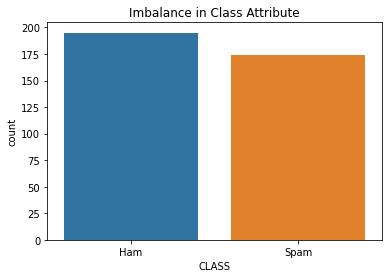

In [25]:
sns.countplot(x='CLASS', data= shakira)
plt.title("Imbalance in Class Attribute")
plt.xticks([0, 1], ['Ham', 'Spam'])

In [26]:
shakira['CLASS'].value_counts()

0    195
1    174
Name: CLASS, dtype: int64

In [44]:
print("Percentage of Ham:",round(((195/shakira.shape[0])*100),2))
print("Percentage of Spam:",round(((174/shakira.shape[0])*100),2))

Percentage of Ham: 52.85
Percentage of Spam: 47.15


The data is balanced

## Text Preprocessing

In [5]:
content = shakira['CONTENT']
#Separate the comments from the dataset

In [6]:
comments = " ".join(comment for comment in content)
comments[:200]
#Convert to a string

'Nice song\ufeff I love song \ufeff I love song \ufeff 860,000,000 lets make it first female to reach one billion!! Share it and replay it! \ufeff shakira is best for worldcup\ufeff The best world cup song ever!!!!\ufeff I love\ufeff SE'

In [7]:
comments = comments.split()
print(comments[:200])
#Tokenize the words

['Nice', 'song\ufeff', 'I', 'love', 'song', '\ufeff', 'I', 'love', 'song', '\ufeff', '860,000,000', 'lets', 'make', 'it', 'first', 'female', 'to', 'reach', 'one', 'billion!!', 'Share', 'it', 'and', 'replay', 'it!', '\ufeff', 'shakira', 'is', 'best', 'for', 'worldcup\ufeff', 'The', 'best', 'world', 'cup', 'song', 'ever!!!!\ufeff', 'I', 'love\ufeff', 'SEE', 'SOME', 'MORE', 'SONG', 'OPEN', 'GOOGLE', 'AND', 'TYPE', 'Shakira', 'GuruOfMovie\ufeff', 'Awesome', '\ufeff', 'I', 'like', 'shakira..\ufeff', 'Shakira', '-', 'Waka', 'Waka', '<br', '/>LOVE', 'THIS', 'SONG!!!!!!!!!!!!!!!\ufeff', 'Why', 'so', 'many', 'disliked??????!!!!!!😯\ufeff', 'I', 'don&#39;t', 'think', 'this', 'song', 'will', 'ever', 'get', 'old', '\ufeff', 'Love', 'song\ufeff', 'wery', 'good\ufeff', 'Every', 'time', 'I', 'hear', 'this', 'song,', 'I', 'think', 'about', 'Iniesta&#39;s', 'goal', 'against', 'the', 'Netherlands...\ufeff', 'Whose', 'watching', 'this', 'in', '2015.', 'If', 'so', 'hi-5\ufeff', 'I', 'love', 'this', 'song',

In [8]:
print(string.punctuation)
table = str.maketrans('', '', string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [9]:
comments = [c.translate(table) for c in comments]
print(comments[:100])
#remove punctutation

['Nice', 'song\ufeff', 'I', 'love', 'song', '\ufeff', 'I', 'love', 'song', '\ufeff', '860000000', 'lets', 'make', 'it', 'first', 'female', 'to', 'reach', 'one', 'billion', 'Share', 'it', 'and', 'replay', 'it', '\ufeff', 'shakira', 'is', 'best', 'for', 'worldcup\ufeff', 'The', 'best', 'world', 'cup', 'song', 'ever\ufeff', 'I', 'love\ufeff', 'SEE', 'SOME', 'MORE', 'SONG', 'OPEN', 'GOOGLE', 'AND', 'TYPE', 'Shakira', 'GuruOfMovie\ufeff', 'Awesome', '\ufeff', 'I', 'like', 'shakira\ufeff', 'Shakira', '', 'Waka', 'Waka', 'br', 'LOVE', 'THIS', 'SONG\ufeff', 'Why', 'so', 'many', 'disliked😯\ufeff', 'I', 'don39t', 'think', 'this', 'song', 'will', 'ever', 'get', 'old', '\ufeff', 'Love', 'song\ufeff', 'wery', 'good\ufeff', 'Every', 'time', 'I', 'hear', 'this', 'song', 'I', 'think', 'about', 'Iniesta39s', 'goal', 'against', 'the', 'Netherlands\ufeff', 'Whose', 'watching', 'this', 'in', '2015', 'If']


In [10]:
comments = [c.lower() for c in comments]
print(comments[:200])
#convert all text to lowercase

['nice', 'song\ufeff', 'i', 'love', 'song', '\ufeff', 'i', 'love', 'song', '\ufeff', '860000000', 'lets', 'make', 'it', 'first', 'female', 'to', 'reach', 'one', 'billion', 'share', 'it', 'and', 'replay', 'it', '\ufeff', 'shakira', 'is', 'best', 'for', 'worldcup\ufeff', 'the', 'best', 'world', 'cup', 'song', 'ever\ufeff', 'i', 'love\ufeff', 'see', 'some', 'more', 'song', 'open', 'google', 'and', 'type', 'shakira', 'guruofmovie\ufeff', 'awesome', '\ufeff', 'i', 'like', 'shakira\ufeff', 'shakira', '', 'waka', 'waka', 'br', 'love', 'this', 'song\ufeff', 'why', 'so', 'many', 'disliked😯\ufeff', 'i', 'don39t', 'think', 'this', 'song', 'will', 'ever', 'get', 'old', '\ufeff', 'love', 'song\ufeff', 'wery', 'good\ufeff', 'every', 'time', 'i', 'hear', 'this', 'song', 'i', 'think', 'about', 'iniesta39s', 'goal', 'against', 'the', 'netherlands\ufeff', 'whose', 'watching', 'this', 'in', '2015', 'if', 'so', 'hi5\ufeff', 'i', 'love', 'this', 'song', 'so', 'much', 'lt3br', 'keep', 'em39', 'coming\ufeff'

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
comments = [c for c in comments if not c in stop_words]
print(comments[:100])
#remove stopwords

['nice', 'song\ufeff', 'love', 'song', '\ufeff', 'love', 'song', '\ufeff', '860000000', 'lets', 'make', 'first', 'female', 'reach', 'one', 'billion', 'share', 'replay', '\ufeff', 'shakira', 'best', 'worldcup\ufeff', 'best', 'world', 'cup', 'song', 'ever\ufeff', 'love\ufeff', 'see', 'song', 'open', 'google', 'type', 'shakira', 'guruofmovie\ufeff', 'awesome', '\ufeff', 'like', 'shakira\ufeff', 'shakira', '', 'waka', 'waka', 'br', 'love', 'song\ufeff', 'many', 'disliked😯\ufeff', 'don39t', 'think', 'song', 'ever', 'get', 'old', '\ufeff', 'love', 'song\ufeff', 'wery', 'good\ufeff', 'every', 'time', 'hear', 'song', 'think', 'iniesta39s', 'goal', 'netherlands\ufeff', 'whose', 'watching', '2015', 'hi5\ufeff', 'love', 'song', 'much', 'lt3br', 'keep', 'em39', 'coming\ufeff', 'love', 'song', 'thumsb', 'you\ufeff', 'waka', 'best', 'one\ufeff', '5', 'years', 'later', 'still', 'love', 'song', 'br', 'axy665\ufeff', 'like\ufeff', 'check', 'playlist', 'youtube\ufeff', 'voice', 'sounds', 'weird']


In [13]:
comments = ','.join(comments)
comments[:200]

'nice,song\ufeff,love,song,\ufeff,love,song,\ufeff,860000000,lets,make,first,female,reach,one,billion,share,replay,\ufeff,shakira,best,worldcup\ufeff,best,world,cup,song,ever\ufeff,love\ufeff,see,song,open,google,type,shakira,guruofmovi'

In [14]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

print(deEmojify(comments))
#remove emjois

nice,song﻿,love,song,﻿,love,song,﻿,860000000,lets,make,first,female,reach,one,billion,share,replay,﻿,shakira,best,worldcup﻿,best,world,cup,song,ever﻿,love﻿,see,song,open,google,type,shakira,guruofmovie﻿,awesome,﻿,like,shakira﻿,shakira,,waka,waka,br,love,song﻿,many,disliked﻿,don39t,think,song,ever,get,old,﻿,love,song﻿,wery,good﻿,every,time,hear,song,think,iniesta39s,goal,netherlands﻿,whose,watching,2015,hi5﻿,love,song,much,lt3br,keep,em39,coming﻿,love,song,thumsb,you﻿,waka,best,one﻿,5,years,later,still,love,song,br,axy665﻿,like﻿,check,playlist,youtube﻿,voice,sounds,weird,plus,she39s,cute,blonde﻿,many,dislikes,song,awesome,sounds,like,must,stop,racists,could,would,like,1000000000,times﻿,nice,love,itttttttt,wurkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk﻿,still,watching,2015﻿,shakira,favourite,singer,wooooo﻿,remember,song,like﻿,whose,watching,2015,like﻿,support,fight,4th,amendment,right,privacy,home,stop,nsa,spying,americans,un,patr

## Univariate Analysis

### Comment Length

In [4]:
shakira['CONTENT_LENGTH'] = shakira.CONTENT.apply(lambda x: x.split())
#Create a new column based on CONTENT and tokenize the text
shakira['CONTENT_LENGTH'] = shakira.CONTENT.apply(lambda x: x.lower())
#convert all the characters to lowercase
shakira['CONTENT_LENGTH'] = shakira.CONTENT.apply(lambda x: ''.join([c for c in x if c not in punctuation]))
#Remove the puncutation
shakira['CONTENT_LENGTH']=shakira.CONTENT.apply(lambda x:len(x))
#Find the length of each comment
shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0,10
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0,13
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0,13
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0,86
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0,29


In [5]:
print("Average Comment Length:",shakira['CONTENT_LENGTH'].mean())
print("Minimum Comment Length:",shakira['CONTENT_LENGTH'].min())
print("Maximum Comment Length:",shakira['CONTENT_LENGTH'].max())

Average Comment Length: 108.92432432432433
Minimum Comment Length: 2
Maximum Comment Length: 1125


Text(0.5, 1.0, 'Distribution of comment length')

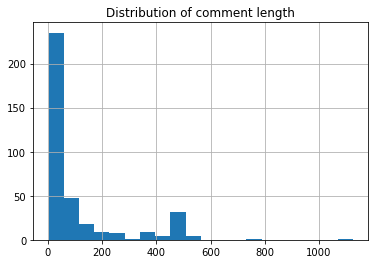

In [48]:
shakira['CONTENT_LENGTH'].hist(bins=20)
plt.title('Distribution of comment length')

Most comments in the dataset are less than 50 words meaning that most users leave shorter comments.

### Dates

In [50]:
#extracting the year and month from the DATE attribute
shakira['YEAR_MONTH'] = shakira['DATE'].dt.strftime('%Y-%m')
shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH,YEAR_MONTH
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29 02:30:18.971,Nice song﻿,0,10,2015-05
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29 00:14:48.748,I love song ﻿,0,13,2015-05
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28 21:00:08.607,I love song ﻿,0,13,2015-05
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28 20:47:12.193,"860,000,000 lets make it first female to reach...",0,86,2015-05
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28 17:08:29.827,shakira is best for worldcup﻿,0,29,2015-05


In [52]:
shakira['YEAR_MONTH'].value_counts()

2015-05    162
2013-10     72
2013-09     43
2013-08     39
2013-07     38
2015-04      8
2013-11      7
Name: YEAR_MONTH, dtype: int64

Text(0.5, 1.0, 'Date of Comments')

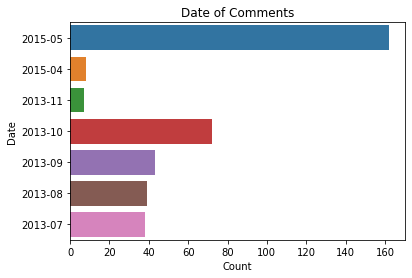

In [56]:
sns.countplot(y='YEAR_MONTH', data= shakira)
plt.xlabel('Count')
plt.ylabel('Date')
plt.title('Date of Comments')

Most of the observations in the dataset are from May of 2015 and the least observations are from November of 2013.

### Frequency of Comments

In [111]:
shakira.AUTHOR.value_counts()

Shadrach Grentz                      7
5000palo                             7
Hidden Love                          5
James Cook                           4
Pyles Baxter                         3
                                    ..
Raafat saeed                         1
Oreoluwa Ajjayi                      1
Ishfaq khan                          1
How To Make Money On The Internet    1
Robloxia Asap                        1
Name: AUTHOR, Length: 319, dtype: int64

<AxesSubplot:xlabel='count', ylabel='AUTHOR'>

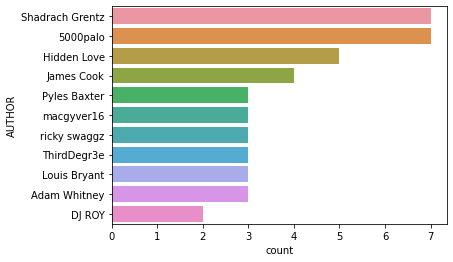

In [95]:
sns.countplot(y='AUTHOR', data=shakira,
              order=shakira.AUTHOR.value_counts().iloc[:11].index)

In [96]:
shakira.loc[(shakira['AUTHOR']=='Shadrach Grentz')]
#Comments from the top commenter

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH,YEAR_MONTH
250,_2viQ_Qnc68dceJbTRNTP2sksMxa_lm35LaCu_jPluY,Shadrach Grentz,2013-09-29 13:59:42.162,Hey Music Fans I really appreciate any of you ...,1,506,2013-09
328,_2viQ_Qnc69zyetF6GsHRzYGyXl4u5kg0Sm-nP-pupI,Shadrach Grentz,2013-08-02 03:15:46.914,Hey Music Fans I really appreciate any of you ...,1,505,2013-08
329,_2viQ_Qnc699u36gNm3NRoq1quIaJWRNrftGEEZM3J4,Shadrach Grentz,2013-08-01 21:43:52.122,Hey Music Fans I really appreciate any of you ...,1,506,2013-08
330,_2viQ_Qnc68LqKGb40V2ImKQYcp1ZqpHrCCMFqMCcA4,Shadrach Grentz,2013-08-01 20:39:15.325,Hey Music Fans I really appreciate any of you ...,1,506,2013-08
334,_2viQ_Qnc69Nq0Ytk1jCpzWPCrpGEk6T7cdVAxfSlAk,Shadrach Grentz,2013-07-29 17:39:24.876,Hey Music Fans I really appreciate any of you ...,1,506,2013-07
341,_2viQ_Qnc6_YN7xFNAg14zX99Y614Salf57yOcrBRSw,Shadrach Grentz,2013-07-21 12:21:37.898,Hey Music Fans I really appreciate all of you ...,1,504,2013-07
358,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14 03:11:20.243,Hey Music Fans I really appreciate all of you ...,1,504,2013-07


The user, Shadrach Grentz, left the most comments. All of them are also marked as spam.

## Bivariate

Separating spam from non-spam comments in the Class attribute for further analysis

In [15]:
nonspam_comments = shakira.loc[(shakira['CLASS'] == 0)]
nonspam_comments.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29 02:30:18.971,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29 00:14:48.748,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28 21:00:08.607,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28 20:47:12.193,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28 17:08:29.827,shakira is best for worldcup﻿,0


In [16]:
nonspam_comments['DATE']=nonspam_comments['DATE'].astype('datetime64[ns]')

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
spam_comments = shakira.loc[(shakira['CLASS']==1)]
spam_comments.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
7,z12uujnj2sifvzvav04chpypvofvexpoggg,Sudheer Yadav,2015-05-28 10:28:25.133,SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakir...,1
22,z13zjlpo2nbehxwf322gelhzwmqwgn1mt,Raafat saeed,2015-05-27 04:19:29.178,Check out this playlist on YouTube:﻿,1
31,z13uhhxp5nvig15yc04citszvtagwtmpqcc,Terry Short,2015-05-26 14:33:52.496,Support the fight for your 4th amendment right...,1
36,z13gv1bxbuytgjl3o23fdr5r3kaadbbm1,‫حلم الشباب‬‎,2015-05-25 23:42:49.533,Check out this video on YouTube:﻿,1
51,z12bfraboyajftgbz04ccbkr3xjxfxyxsew,Abdullah Fawzi,2015-05-25 06:25:22.319,"coby this USL and past :<br /><a href=""http://...",1


In [18]:
spam_comments['DATE']=spam_comments['DATE'].astype('datetime64[ns]')

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Content vs Class

#### Spam Comments

In [24]:
#text cleaning on spam comments
spam_content = spam_comments['CONTENT'] #pulling comments from the dataframe
spam_content = " ".join(comment for comment in spam_content) #convert to a string object
spam_content = spam_content.split() #word tokenization
table = str.maketrans('', '', string.punctuation)
spam_content = [sc.translate(table) for sc in spam_content] #removing punctuation
spam_content = [sc.lower() for sc in spam_content] #converting all text to lowercase
spam_content = ','.join(spam_content) #returns to string object
print(deEmojify(spam_content)) #removing emojis

see,some,more,song,open,google,and,type,shakira,guruofmovie﻿,check,out,this,playlist,on,youtube﻿,support,the,fight,for,your,4th,amendment,right,to,privacy,in,your,home,stop,the,nsa,spying,on,americans,with,the,un,patriot,act,renewal,rand,paul,has,spent,105,hours,on,the,senate,floor,in,a,protest,and,filibuster,fighting,for,our,constitution,that,this,nation,is,founded,on,join,the,fight,at,rand,paul,dot,com,spread,the,word,we,have,someone,that,cares,about,our,nation,email,your,senators,congress,men,and,women,tell,them,to,support,rand,tell,the,news,to,support,rand,too,senator,rand,paul,was,up,until,a,hrefhttpwwwyoutubecomwatchvprpeedmmmq0ampt1m00s100a,am,this,passed,saturday,morning,fighting,for,our,constitution,buy,postponing,the,vote,until,this,week,our,constitution,matters,join,rand,in,the,fight,to,protect,a,hrefhttpithtithta,to,privacy,in,your,home,and,business,senator,rand,paul,was,up,until,a,hrefhttpwwwyoutubecomwatchvprpeedmmmq0ampt1m00s100a,am,this,passed,saturday,morning,fighting,

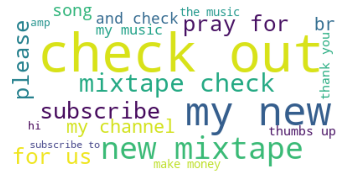

In [25]:
#Building word cloud
stopwords = set(STOPWORDS) #remove stop-words
wordcloud_spam = WordCloud(max_words=20, 
                background_color ='white', 
                stopwords = stopwords).generate(spam_content) 
plt.imshow(wordcloud_spam) 
plt.axis("off")
plt.show()

The top 20 most common words in the spam comments are shown in the word cloud and include: mixtape, check out, subcribe and my music

#### Non-Spam Comments

In [26]:
#text cleaning on non-spam comments
nonspam_content = nonspam_comments['CONTENT'] #pulling non-spam comments from dataframe
nonspam_content = " ".join(comment for comment in nonspam_content) #convert to a string object
nonspam_content = nonspam_content.split() #word tokenization
nonspam_content = [nsc.translate(table) for nsc in nonspam_content] #removing punctuation
nonspam_content = [nsc.lower() for nsc in nonspam_content] #converting all text to lowercase
nonspam_content = ','.join(nonspam_content) #returns to string object
print(deEmojify(nonspam_content)) #removing emojis
nonspam_content[:100]

nice,song﻿,i,love,song,﻿,i,love,song,﻿,860000000,lets,make,it,first,female,to,reach,one,billion,share,it,and,replay,it,﻿,shakira,is,best,for,worldcup﻿,the,best,world,cup,song,ever﻿,i,love﻿,awesome,﻿,i,like,shakira﻿,shakira,,waka,waka,br,love,this,song﻿,why,so,many,disliked﻿,i,don39t,think,this,song,will,ever,get,old,﻿,love,song﻿,wery,good﻿,every,time,i,hear,this,song,i,think,about,iniesta39s,goal,against,the,netherlands﻿,whose,watching,this,in,2015,if,so,hi5﻿,i,love,this,song,so,much,lt3br,keep,em39,coming﻿,i,love,this,song,thumsb,up,to,you﻿,waka,best,one﻿,5,years,later,i,still,love,this,song,br,axy665﻿,like﻿,her,voice,sounds,weird,and,plus,she39s,cute,for,a,blonde﻿,why,there,are,so,many,dislikes,this,song,is,so,awesome,it,sounds,like,we,must,stop,be,racists,if,i,could,i,would,like,it,1000000000,times﻿,nice,love,itttttttt,wurkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk﻿,still,watching,in,2015﻿,shakira,is,my,favourite,singer,woooo

'nice,song\ufeff,i,love,song,\ufeff,i,love,song,\ufeff,860000000,lets,make,it,first,female,to,reach,one,billion,shar'

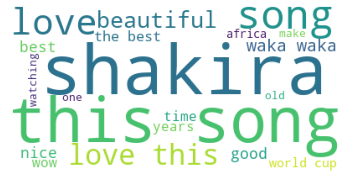

In [50]:
stopwords = set(STOPWORDS)
wordcloud_nonspam = WordCloud(max_words=20, 
                background_color ='white', 
                stopwords = stopwords).generate(nonspam_content) 
plt.imshow(wordcloud_nonspam) 
plt.axis("off")
plt.show()

For non-spam comments, the words/phrases used are related to the video like the name of the artist, the name of the song or the users personal thoughts on the song/video. The most frequently used words include: Shakira, love, song and beautiful. 

### Author vs Class

#### Spam Comments

In [94]:
spam_comments['AUTHOR'].value_counts()

Shadrach Grentz     7
Hidden Love         5
James Cook          4
Louis Bryant        3
ricky swaggz        3
                   ..
nosa bella          1
Free Video Tv       1
dili bair           1
Charanjeet Singh    1
Scott Johnson       1
Name: AUTHOR, Length: 135, dtype: int64

<AxesSubplot:xlabel='count', ylabel='AUTHOR'>

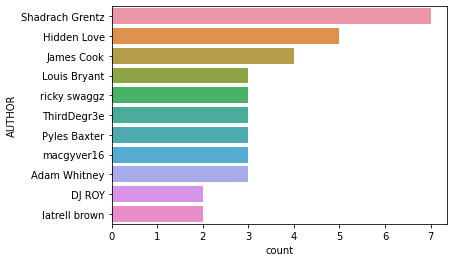

In [97]:
sns.countplot(y='AUTHOR', data=spam_comments,
              order=spam_comments.AUTHOR.value_counts().iloc[:11].index)

In [62]:
spam_comments.loc[(spam_comments['AUTHOR']=='Shadrach Grentz')]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
250,_2viQ_Qnc68dceJbTRNTP2sksMxa_lm35LaCu_jPluY,Shadrach Grentz,2013-09-29 13:59:42.162,Hey Music Fans I really appreciate any of you ...,1
328,_2viQ_Qnc69zyetF6GsHRzYGyXl4u5kg0Sm-nP-pupI,Shadrach Grentz,2013-08-02 03:15:46.914,Hey Music Fans I really appreciate any of you ...,1
329,_2viQ_Qnc699u36gNm3NRoq1quIaJWRNrftGEEZM3J4,Shadrach Grentz,2013-08-01 21:43:52.122,Hey Music Fans I really appreciate any of you ...,1
330,_2viQ_Qnc68LqKGb40V2ImKQYcp1ZqpHrCCMFqMCcA4,Shadrach Grentz,2013-08-01 20:39:15.325,Hey Music Fans I really appreciate any of you ...,1
334,_2viQ_Qnc69Nq0Ytk1jCpzWPCrpGEk6T7cdVAxfSlAk,Shadrach Grentz,2013-07-29 17:39:24.876,Hey Music Fans I really appreciate any of you ...,1
341,_2viQ_Qnc6_YN7xFNAg14zX99Y614Salf57yOcrBRSw,Shadrach Grentz,2013-07-21 12:21:37.898,Hey Music Fans I really appreciate all of you ...,1
358,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14 03:11:20.243,Hey Music Fans I really appreciate all of you ...,1


In [63]:
spam_comments.loc[(spam_comments['AUTHOR']=='Hidden Love')]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
253,_2viQ_Qnc6_onwOgxju-DV6WkqHZEOztCXD04EgEFBU,Hidden Love,2013-09-24 14:29:54.072,Hi. Check out and share our songs.,1
325,_2viQ_Qnc69r15LuL8TDbisnTJ_hf5RfcyJAyoMC5eo,Hidden Love,2013-08-06 11:40:05.581,Hi. Check out and share our songs.,1
331,_2viQ_Qnc68Qq98m0mmx4rlprYiD6aYgMb2x3bdupEM,Hidden Love,2013-08-01 09:19:56.654,Hi. Check out and share our songs.,1
332,_2viQ_Qnc698fLCQzZmRt1CqPhf0L6mchwWG5gsUlzk,Hidden Love,2013-07-31 10:22:02.628,Hi. Check out and share our songs.,1
333,_2viQ_Qnc68sxLpsBQ1cPk_LLH91SMsRav51KmhIoQw,Hidden Love,2013-07-30 11:22:57.091,Hi.Check out and share our songs.,1


In [64]:
spam_comments.loc[(spam_comments['AUTHOR']=='James Cook')]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
186,_2viQ_Qnc69ShtSmsaBOGFHrTAVCkLAtpOr40oiL5Yg,James Cook,2013-10-20 13:31:10.083,Stop Wasting Up Your Time and Get Paid To Mes...,1
192,_2viQ_Qnc68eqIzELH00rh9umGlUKSRuQvWZAXhr_qM,James Cook,2013-10-15 17:00:04.573,Stop Wasting Up Your Time and Get Paid To Mes...,1
194,_2viQ_Qnc6-grcnVFTtwnhvC9tpgVG33p5a0AZHKlLI,James Cook,2013-10-14 10:35:03.861,Hello Guys...I Found a Way to Make Money Onlin...,1
200,_2viQ_Qnc69BVRuBYCJ6ik7gdMwTiBRS9DDnTjNs-Gg,James Cook,2013-10-10 18:08:07.815,Hello Guys...I Found a Way to Make Money Onlin...,1


The top 3 of the spam comment authors post comments directing users to check out their own music or about making money online. They each also post the exact same comment over and over again at different times and on different days.

#### Non-Spam Comments

In [99]:
nonspam_comments['AUTHOR'].value_counts()

5000palo                7
LaiLa Steudle           2
Eric Gonzalez           2
LiveLikeLien x          2
Alain Bruno             2
                       ..
Sabina Pearson-Smith    1
Aishlin Maciel          1
Nimesh Nambiar          1
Mohammed Yousef         1
ranferi delgado         1
Name: AUTHOR, Length: 184, dtype: int64

<AxesSubplot:xlabel='count', ylabel='AUTHOR'>

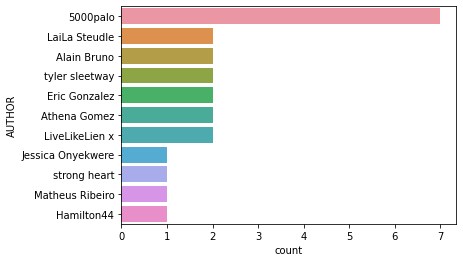

In [65]:
sns.countplot(y='AUTHOR', data=nonspam_comments,
              order=nonspam_comments.AUTHOR.value_counts().iloc[:11].index)

In [70]:
nonspam_comments.loc[(nonspam_comments['AUTHOR']=='5000palo')]['CONTENT'][:50]

215     She is perfect
221    I want new song
223        Shakira :-*
234        Shakira :-*
261     She is perfect
264        Shakira :-*
286        Shakira :-*
Name: CONTENT, dtype: object

In [73]:
nonspam_comments.loc[(nonspam_comments['AUTHOR']=='LaiLa Steudle')]['CONTENT'][:50]

145             I love you Shakiria!!!!!!﻿
146    Me and my aunt love this song!!!!!﻿
Name: CONTENT, dtype: object

One the other hand the non-spam users post comments related to the song or video and about their love for the artist. Also, leaving more than 2 comments is considered an outlier.

### Comment Length vs Class 

#### Spam Comments

Text(0.5, 1.0, 'Distribution of Spam Comment Length')

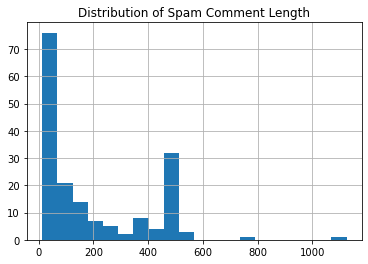

In [11]:
spam_comments['CONTENT_LENGTH'].hist(bins=20)
plt.title('Distribution of Spam Comment Length')

In [12]:
print("Average Comment Length:",spam_comments['CONTENT_LENGTH'].mean())
print("Minimum Comment Length:",spam_comments['CONTENT_LENGTH'].min())
print("Maximum Comment Length:",spam_comments['CONTENT_LENGTH'].max())

Average Comment Length: 196.33908045977012
Minimum Comment Length: 13
Maximum Comment Length: 1125


#### Non-Spam Comments

Text(0.5, 1.0, 'Distribution of Non-Spam Comment Length')

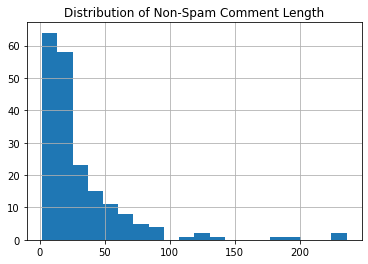

In [13]:
nonspam_comments['CONTENT_LENGTH'].hist(bins=20)
plt.title('Distribution of Non-Spam Comment Length')

In [14]:
print("Average Comment Length:",nonspam_comments['CONTENT_LENGTH'].mean())
print("Minimum Comment Length:",nonspam_comments['CONTENT_LENGTH'].min())
print("Maximum Comment Length:",nonspam_comments['CONTENT_LENGTH'].max())

Average Comment Length: 31.321428571428573
Minimum Comment Length: 2
Maximum Comment Length: 236


Most users leave short comments, however based on the average, minimum and maximum comment length along with the second peak that appears around 450-500 words, spam comments do seem to be longer than non-spam.